# Lab Exam
## Question No 2

In [1]:
percept = ['elevator_control_system']
# On calling the elevator will call -> call move_to_floor(floor_number)
# On capacity exceeded will call -> check_capacity()
# On emergency buttong pressed will call -> emergency_stop() function
states = ['calling_the_elevator', 'capacity_exceeded', 'emergency_button_pressed']
rules = ['call_move_to_floor_function', 'call_capacity_exceeded_function', 'call_emergency_stop_function', 'No Action Needed']


def getState(is_call_elevator, is_capacity_exceeded, is_emergency_button_pressed):
    l = []
    if (not(is_call_elevator) and not(is_capacity_exceeded) and not(is_emergency_button_pressed)):
        return []
    elif (not(is_call_elevator) and not(is_capacity_exceeded) and is_emergency_button_pressed):
        l = []
        l.append(states[2])
        return l
    elif (not(is_call_elevator) and is_capacity_exceeded and not(is_emergency_button_pressed)):
        l = []
        l.append(states[1])
        return l
    elif (not(is_call_elevator) and is_capacity_exceeded and is_emergency_button_pressed):
        l = []
        l.append(states[1])
        l.append(states[2])
        return l
    elif (is_call_elevator and not(is_capacity_exceeded) and not(is_emergency_button_pressed)):
        l = []
        l.append(states[0])
        return l
    elif (is_call_elevator and not(is_capacity_exceeded) and is_emergency_button_pressed):
        l = []
        l.append(states[0])
        l.append(states[2])
        return states[0], states[2]
    elif (is_call_elevator and is_capacity_exceeded and not(is_emergency_button_pressed)):
        l.append(states[0])
        l.append(states[1])
        return states[0], states[1]
    else:
        return states

In [2]:
def move_to_floor(floor_number):
    print('Lift is coming to floor number => ', floor_number)
    
def check_capacity():
    print("Check the passengers in the elevator")

def emergency_stop():
    print("Alert to Security Life if overloaded")


def getRules(state_value):
    floor_number = 0
    if (len(state_value) == 0):
        return rules[-1]
    elif (len(state_value) == 1):
        print(state_value)
        if (state_value[0] == 'calling_the_elevator'):
            floor_number = int(input("Enter Floor Number => "))
            move_to_floor(floor_number)
        elif (state_value[0] == 'capacity_exceeded'):
            check_capacity()
        elif (state_value[0] == 'emergency_button_pressed'):
            emergency_stop()
    elif (len(state_value) == 2):
        if (state_value[0] == 'capacity_exceeded' and state_value[1] == 'emergency_button_pressed' or state_value[0] == 'emergency_button_pressed' and state_value[1] == 'capacity_exceeded'):
            check_capacity()
            emergency_stop()
        elif (state_value[0] == 'calling_the_elevator' and state_value[1] == 'emergency_button_pressed' or state_value[0] == 'emergency_button_pressed' and state_value[1] == 'calling_the_elevator'):
            floor_number = int(input("Enter Floor Number => "))
            move_to_floor(floor_number)
            emergency_stop()
            
        elif (state_value[0] == 'calling_the_elevator' and state_value[1] == 'capacity_exceeded' or state_value[0] == 'capacity_exceeded' and state_value[1] == 'calling_the_elevator'):
            floor_number = int(input("Enter Floor Number => "))
            move_to_floor(floor_number)
            check_capacity()
    elif (len(state_value) == 3):
        floor_number = int(input("Enter Floor Number => "))
        move_to_floor(floor_number)
        check_capacity()
        emergency_stop()
    else:
        print(rules[3])
        

In [3]:
def simpleReflex_Agent(visual_input_one, visual_input_two, visual_input_three):
    getRules(getState(visual_input_one, visual_input_two, visual_input_three))

In [4]:
test = 0
while(test < 2):
    visual_input_one = bool(int(input("Do You want to call the elevator [0/1]")))
    visual_input_two = bool(int(input("Is capacity of the elevator exceeded [0/1]")))
    visual_input_three = bool(int(input("Is Emergency Button pressed [0/1]")))
    simpleReflex_Agent(visual_input_one, visual_input_two, visual_input_three)
    test += 1

Do You want to call the elevator [0/1] 0
Is capacity of the elevator exceeded [0/1] 1
Is Emergency Button pressed [0/1] 0


['capacity_exceeded']
Check the passengers in the elevator


Do You want to call the elevator [0/1] 1
Is capacity of the elevator exceeded [0/1] 0
Is Emergency Button pressed [0/1] 0


['calling_the_elevator']


Enter Floor Number =>  5


Lift is coming to floor number =>  5


## Question NO 1

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

In [6]:
heart_dataset = pd.read_csv('AI_heart.csv')

In [7]:
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,M,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53.0,M,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70.0,M,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61.0,M,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62.0,F,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
heart_dataset.shape

(1025, 14)

In [9]:
heart_dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59.0,M,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60.0,M,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47.0,M,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50.0,F,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,NaN,M,0,120,188,0,1,113,0,1.4,1,1,3,0


In [10]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       923 non-null    float64
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 112.2+ KB


In [11]:
heart_dataset.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,923.00000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.52221,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.11771,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.00000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.00000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.00000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
### Data Visualization

In [13]:
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,M,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53.0,M,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70.0,M,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61.0,M,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62.0,F,0,138,294,1,1,106,0,1.9,1,3,2,0


In [14]:
target_count = heart_dataset['target'].value_counts()

In [15]:
colors = ['green', 'blue']

Text(0, 0.5, 'Target Frequency')

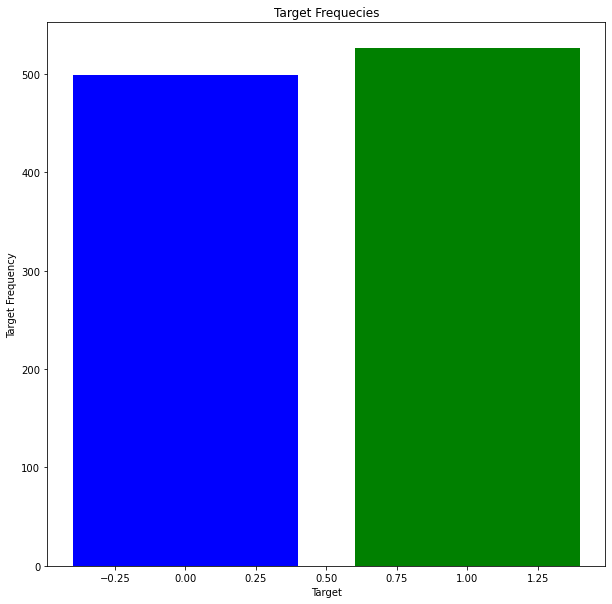

In [16]:
fig = plt.figure(figsize=(10,10))
plt.bar(target_count.index, target_count.values, color=colors)

plt.title('Target Frequecies')
plt.xlabel('Target')
plt.ylabel('Target Frequency')

### Inference:
1. The dataset shows that there are data values in which the person has heart failure

In [17]:
gender_count = heart_dataset['sex'].value_counts()

Text(0, 0.5, 'Target Frequency')

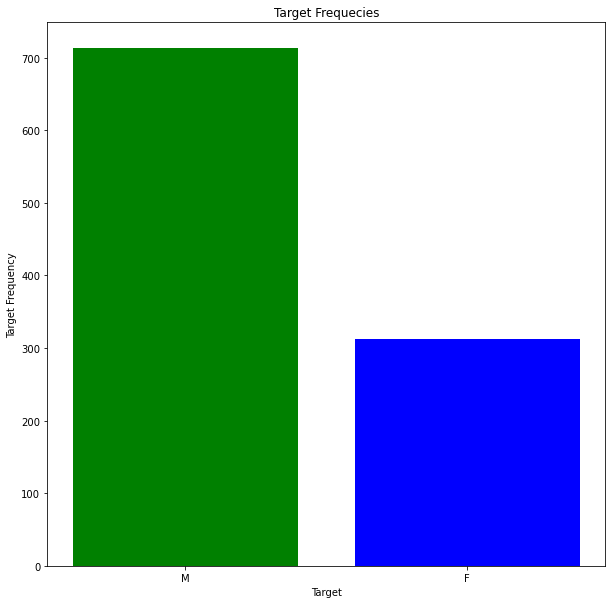

In [18]:
fig = plt.figure(figsize=(10,10))
plt.bar(gender_count.index, gender_count.values, color=colors)

plt.title('Target Frequecies')
plt.xlabel('Target')
plt.ylabel('Target Frequency')

In [19]:
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,M,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53.0,M,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70.0,M,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61.0,M,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62.0,F,0,138,294,1,1,106,0,1.9,1,3,2,0


In [20]:
label_encoder = LabelEncoder()

In [21]:
heart_dataset['sex'] = label_encoder.fit_transform(heart_dataset['sex'])

In [22]:
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53.0,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70.0,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61.0,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62.0,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [23]:
scalar = StandardScaler()

In [24]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,923.00000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.52221,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.11771,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.00000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.00000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [25]:
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'thal']

In [26]:
heart_dataset[columns_to_scale] = scalar.fit_transform(heart_dataset[columns_to_scale])

In [27]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,9.230000e+02,1025.000000,1025.000000,1.025000e+03,1.025000e+03,1025.000000,1025.000000,1.025000e+03,1025.000000,1.025000e+03,1.025000e+03,1025.000000,1.025000e+03,1025.000000
mean,7.932742e-17,0.695610,0.942439,-6.590934e-16,6.282238e-18,0.149268,0.529756,-3.812668e-16,0.336585,-2.341217e-16,1.752528e-16,0.754146,-2.460904e-16,0.513171
std,1.000542e+00,0.460373,1.029641,1.000488e+00,1.000488e+00,0.356527,0.527878,1.000488e+00,0.472772,1.000488e+00,1.000488e+00,1.030798,1.000488e+00,0.500070
min,-2.800708e+00,0.000000,0.000000,-2.148237e+00,-2.327054e+00,0.000000,0.000000,-3.397080e+00,0.000000,-9.123291e-01,-2.243675e+00,0.000000,-3.746070e+00,0.000000
25%,-7.157220e-01,0.000000,0.000000,-6.632165e-01,-6.787242e-01,0.000000,0.000000,-7.442713e-01,0.000000,-9.123291e-01,-6.241209e-01,0.000000,-5.221223e-01,0.000000
50%,1.621669e-01,1.000000,1.000000,-9.205458e-02,-1.163527e-01,0.000000,1.000000,1.255019e-01,0.000000,-2.311765e-01,-6.241209e-01,0.000000,-5.221223e-01,1.000000
75%,7.108475e-01,1.000000,2.000000,4.791073e-01,5.623715e-01,0.000000,1.000000,7.343432e-01,1.000000,6.202642e-01,9.954333e-01,1.000000,1.089852e+00,1.000000
max,2.466625e+00,1.000000,3.000000,3.906079e+00,6.166694e+00,1.000000,2.000000,2.299935e+00,1.000000,4.366603e+00,9.954333e-01,4.000000,1.089852e+00,1.000000


In [28]:
## Handle Missing Values

In [29]:
heart_dataset.fillna(heart_dataset.mean(), inplace=True)

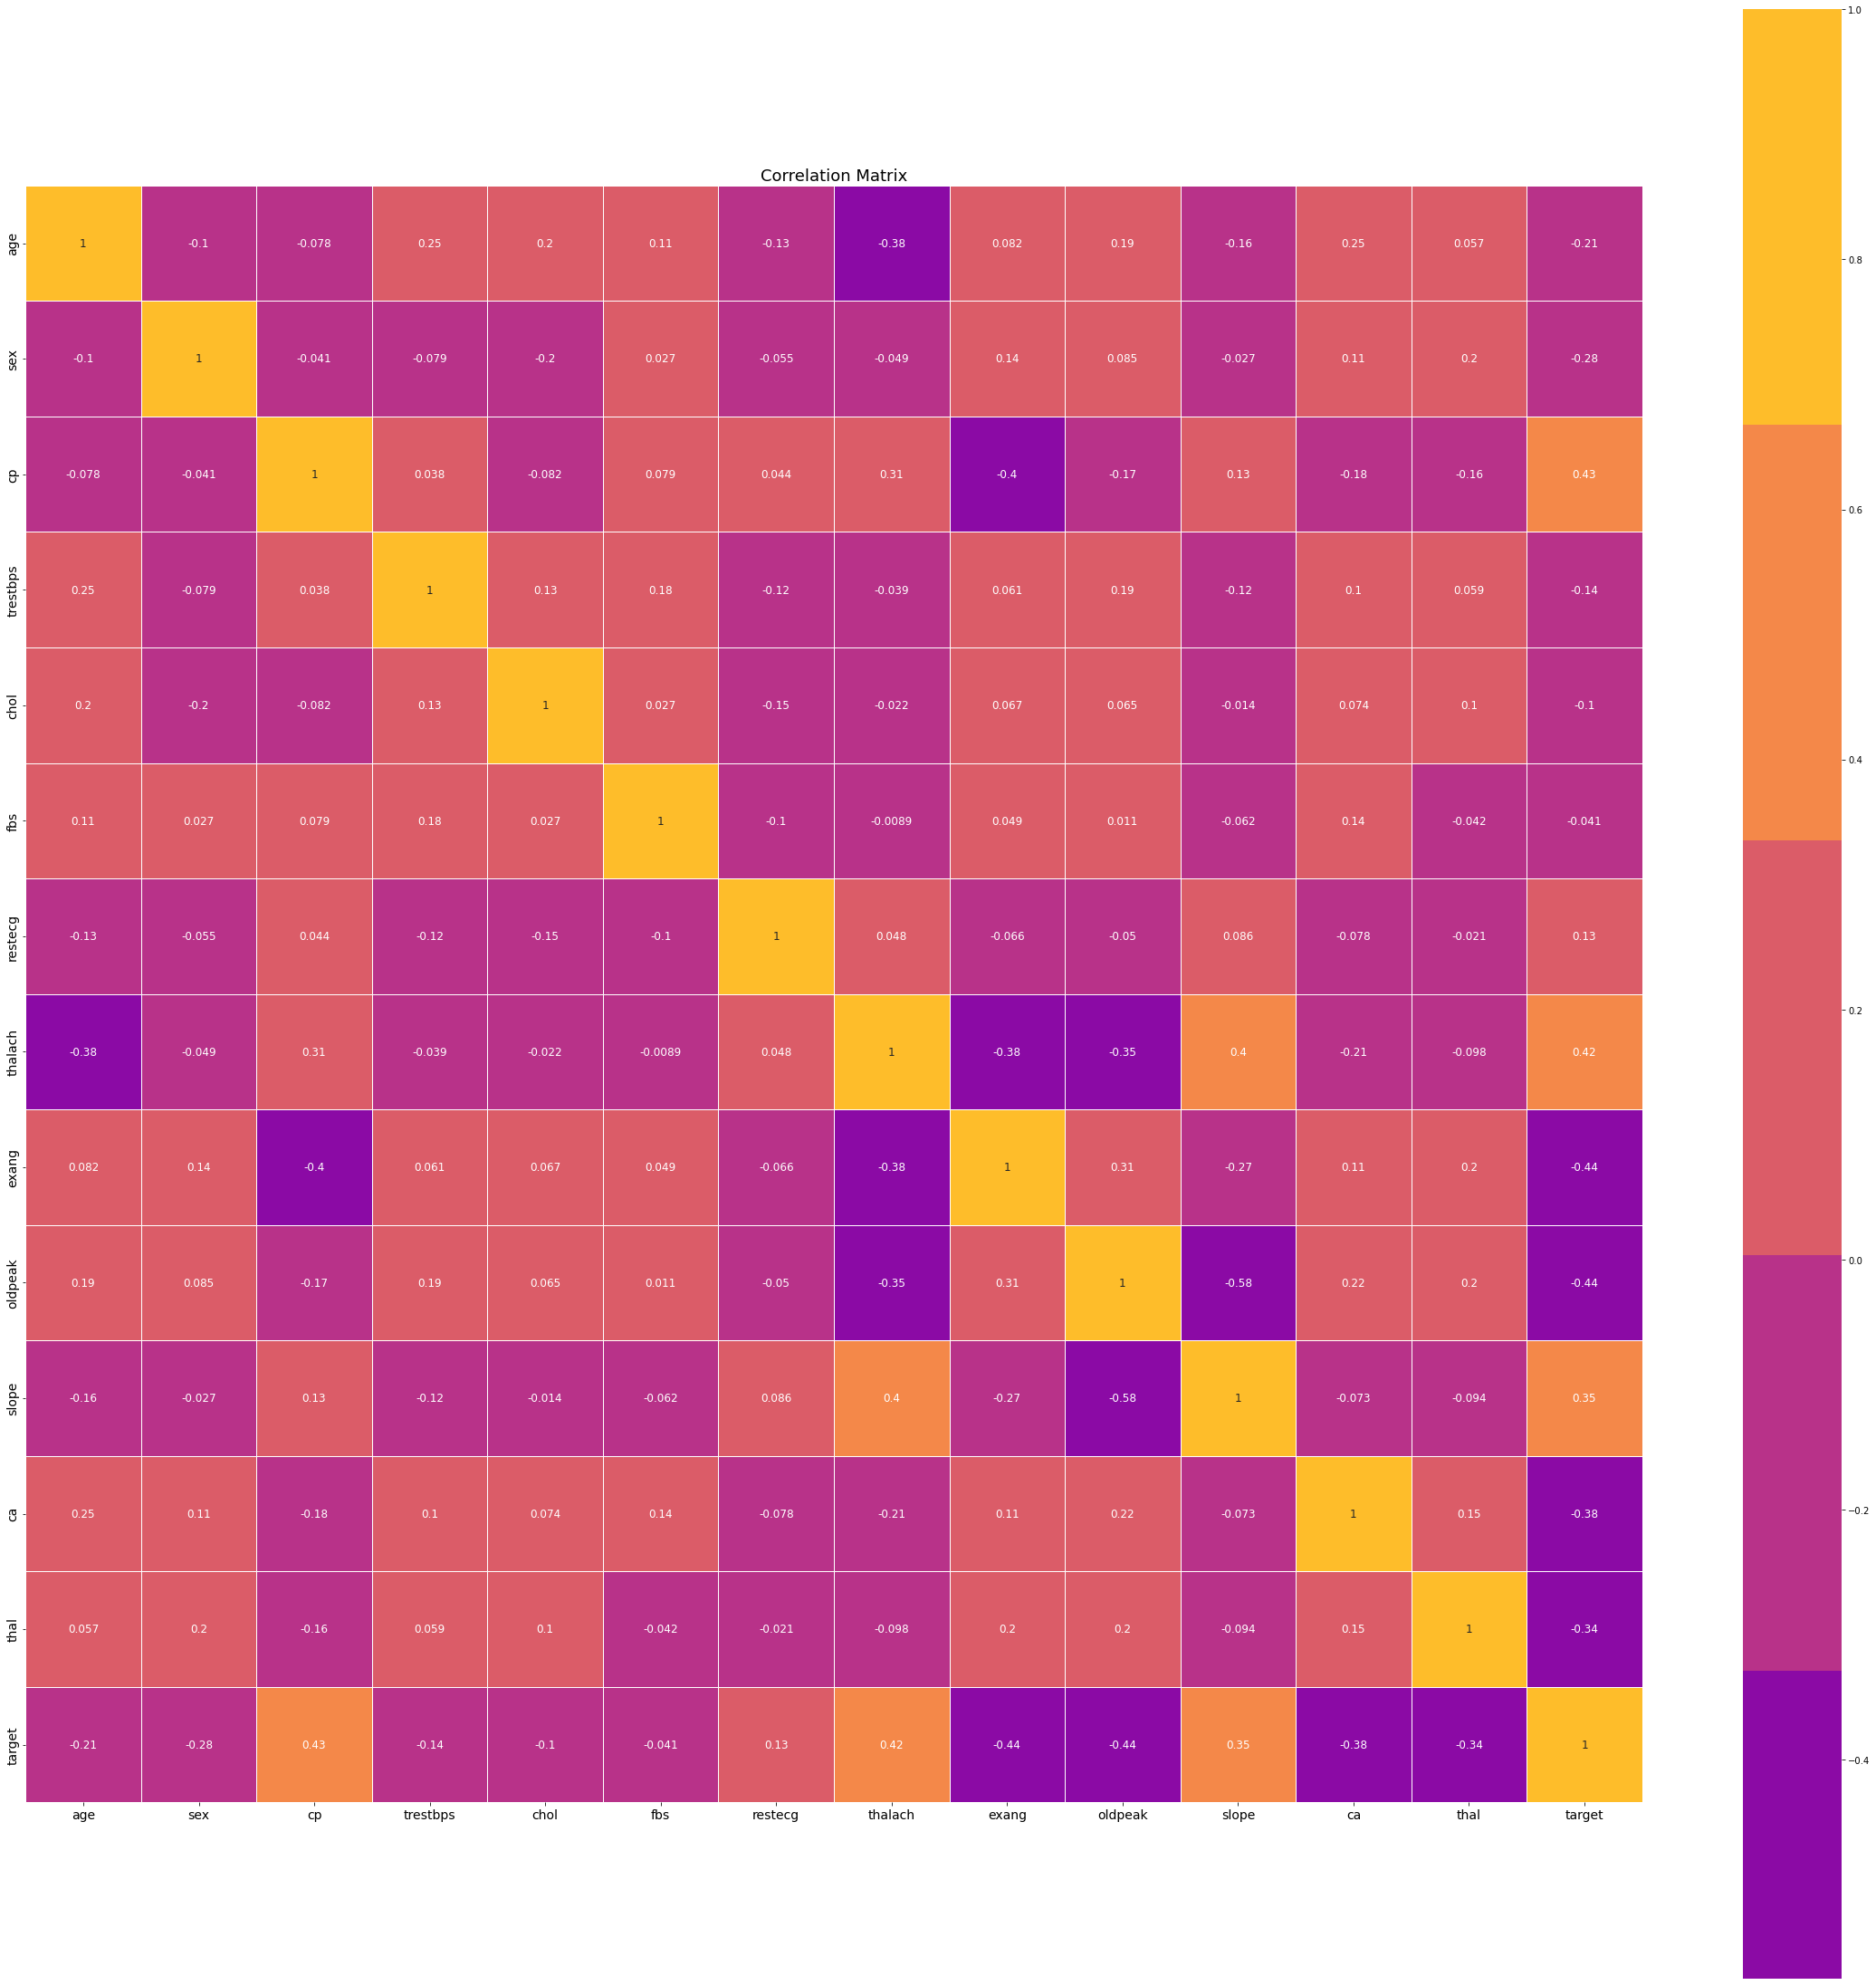

In [30]:
corr_matrix = heart_dataset.corr()
fig, ax = plt.subplots(figsize=(40, 40))
cmap = sns.color_palette("plasma")
sns.heatmap(corr_matrix, cmap=cmap, center=0, square=True, annot=True, annot_kws={'fontsize': 12}, linewidths=.5, ax=ax)
ax.tick_params(axis='both', labelsize=14)
ax.set_title('Correlation Matrix', fontsize=18)
plt.show()

In [31]:
## Select 5 Best Features Based on Correlation Matrix

In [32]:
corr_target = corr_matrix['target']
top_5_cols = corr_target.abs().sort_values(ascending=False)[1:6]
if 'target' in top_5_cols:
    top_5_cols = top_5_cols.drop(target_var)
top_5_cols_using_corr = top_5_cols.index.tolist()
top_5_cols_using_corr

['oldpeak', 'exang', 'cp', 'thalach', 'ca']

In [33]:
best_features_using_corr = heart_dataset[top_5_cols_using_corr]

In [34]:
best_features_using_corr.head()

,oldpeak,exang,cp,thalach,ca
0,-0.060888,0,0,0.821321,2
1,1.727137,1,0,0.255968,0
2,1.301417,1,0,-1.048692,0
3,-0.912329,0,0,0.516900,1
4,0.705408,0,0,-1.874977,3


In [35]:
best_features_using_corr.describe()

,oldpeak,exang,cp,thalach,ca
count,1.025000e+03,1025.000000,1025.000000,1.025000e+03,1025.000000
mean,-2.341217e-16,0.336585,0.942439,-3.812668e-16,0.754146
std,1.000488e+00,0.472772,1.029641,1.000488e+00,1.030798
min,-9.123291e-01,0.000000,0.000000,-3.397080e+00,0.000000
25%,-9.123291e-01,0.000000,0.000000,-7.442713e-01,0.000000
50%,-2.311765e-01,0.000000,1.000000,1.255019e-01,0.000000
75%,6.202642e-01,1.000000,2.000000,7.343432e-01,1.000000
max,4.366603e+00,1.000000,3.000000,2.299935e+00,4.000000


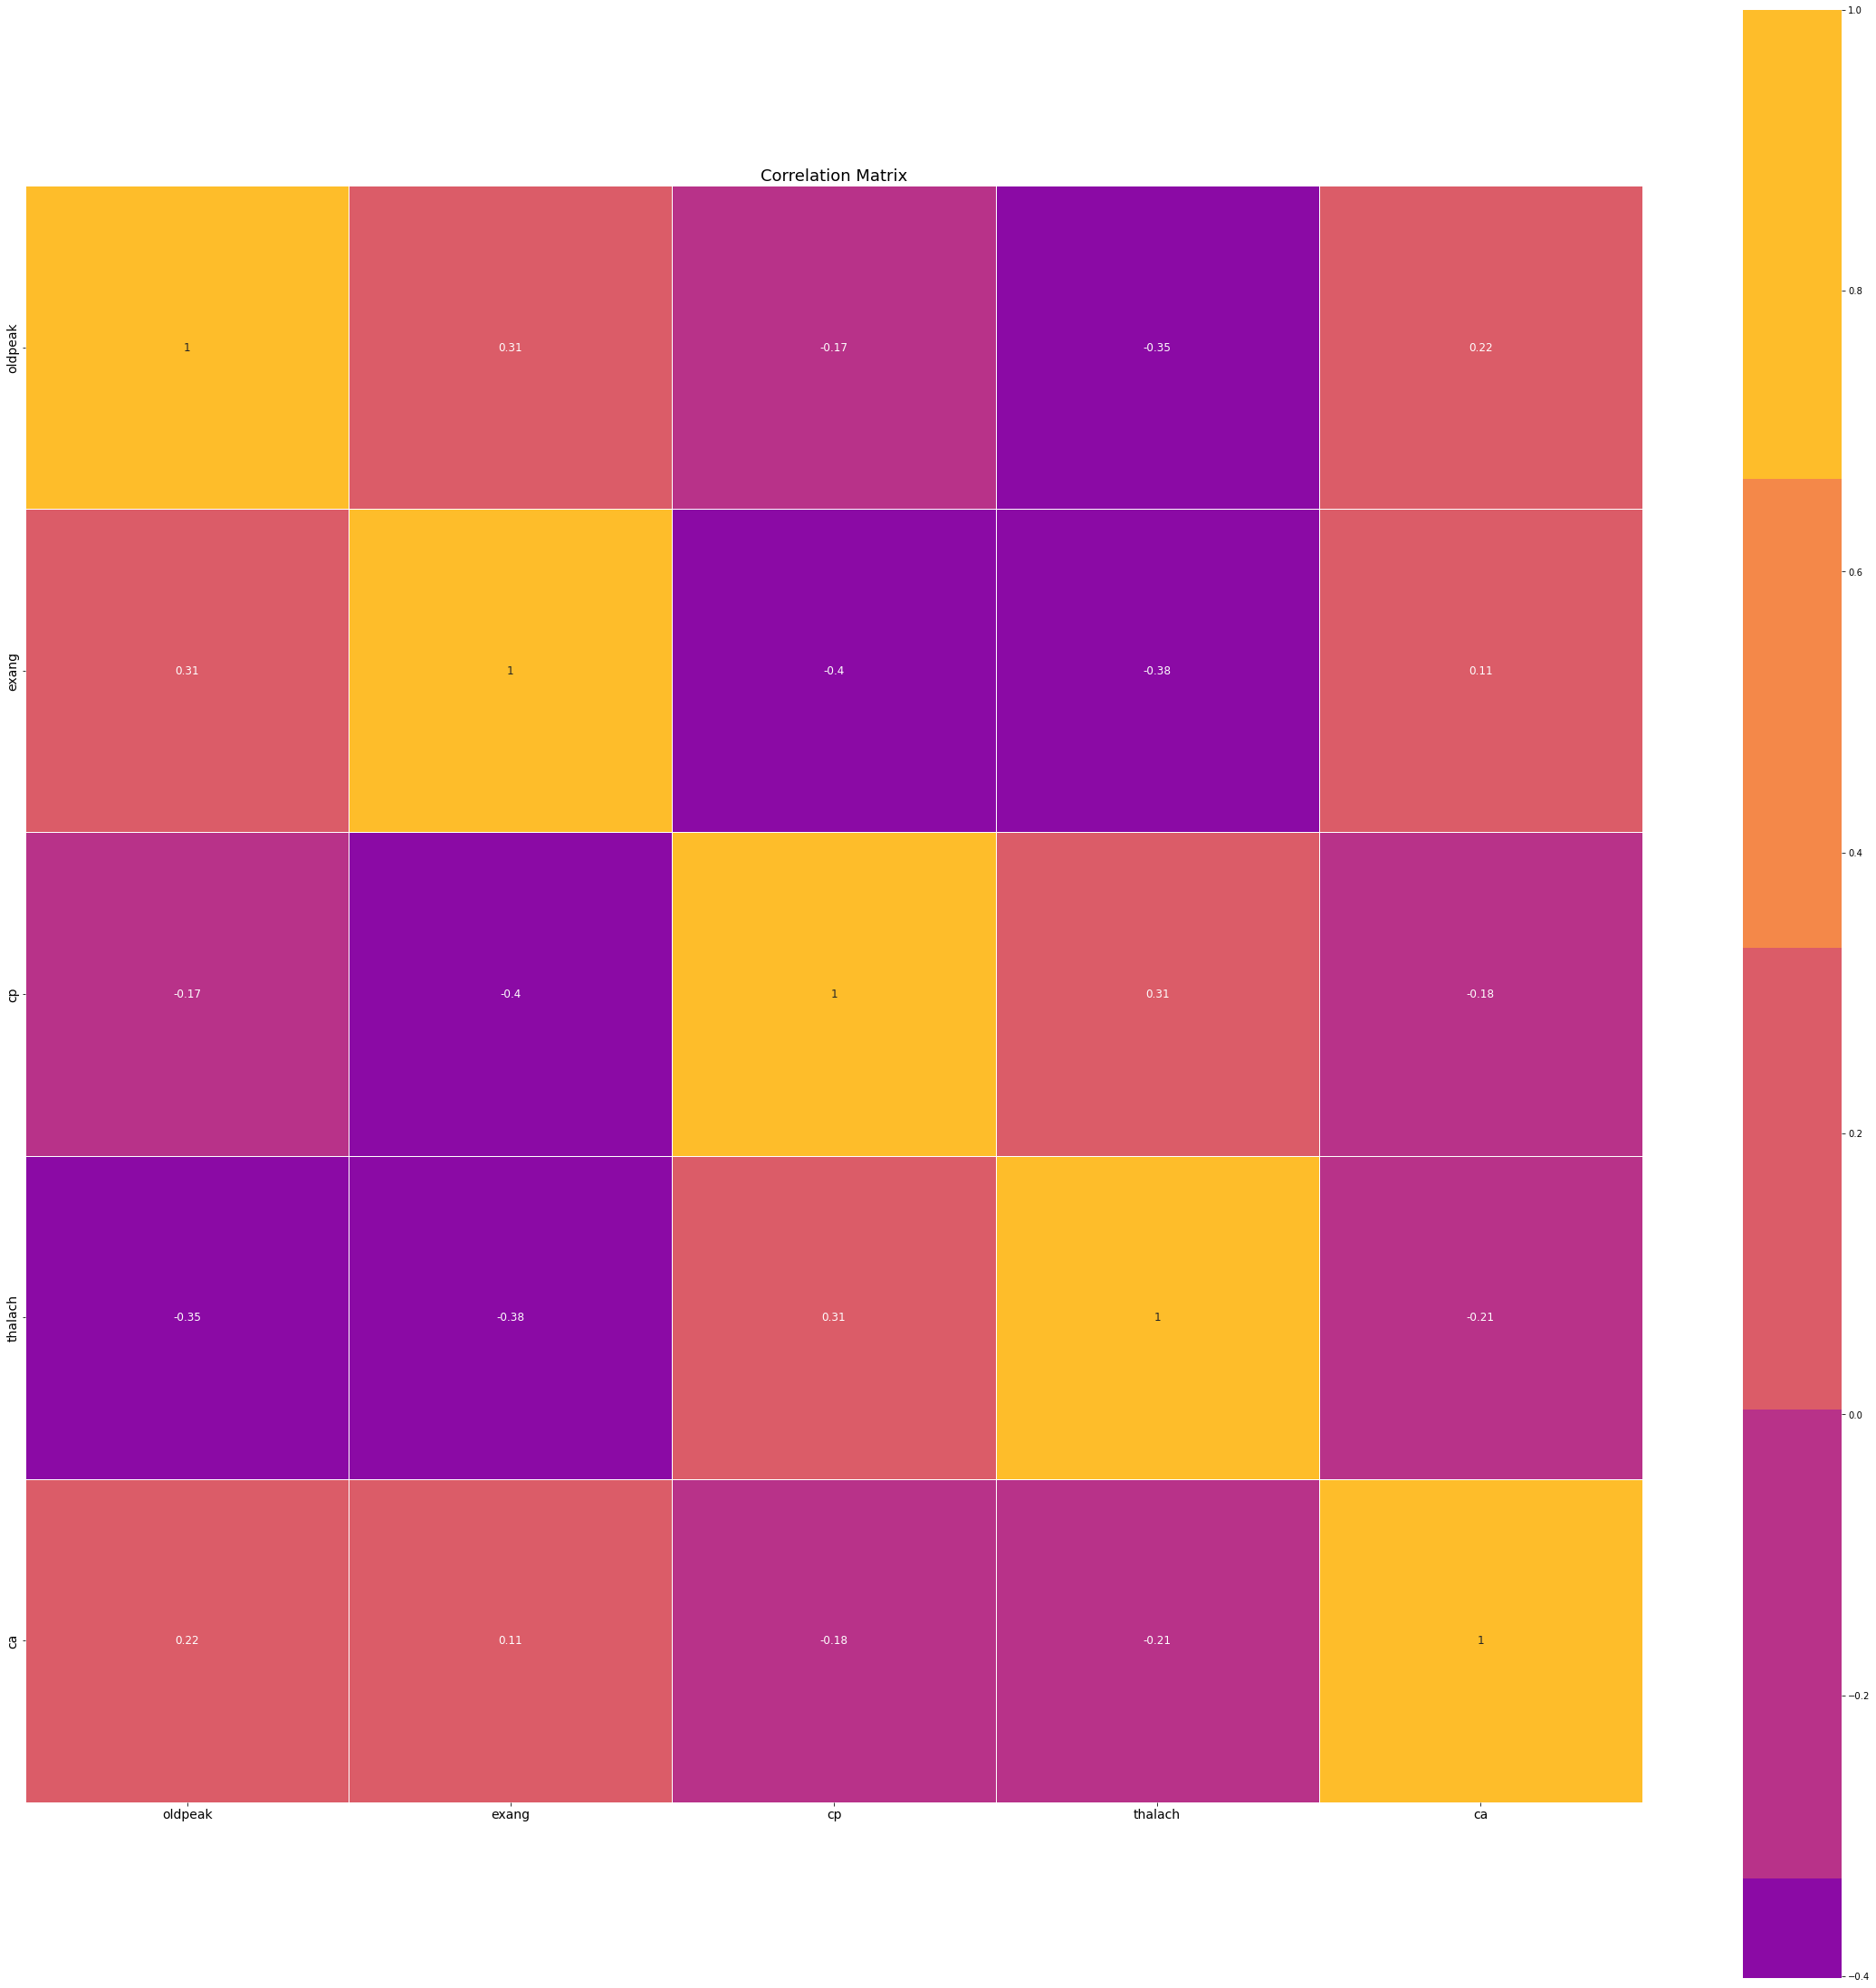

In [36]:
corr_matrix = best_features_using_corr.corr()
fig, ax = plt.subplots(figsize=(40, 40))
cmap = sns.color_palette("plasma")
sns.heatmap(corr_matrix, cmap=cmap, center=0, square=True, annot=True, annot_kws={'fontsize': 12}, linewidths=.5, ax=ax)
ax.tick_params(axis='both', labelsize=14)
ax.set_title('Correlation Matrix', fontsize=18)
plt.show()

In [37]:
## Features Selection Using Information Gain Method

In [38]:
# extract the features and target variable
X = heart_dataset.drop('target', axis=1)
y = heart_dataset['target']

# calculate the information gain of each feature
info_gain = mutual_info_classif(X, y)

# create a dataframe to store the information gain of each feature
ig_df = pd.DataFrame({'feature': X.columns, 'info_gain': info_gain})

# sort the dataframe by information gain in descending order
ig_df = ig_df.sort_values(by='info_gain', ascending=False)

# select the top five features based on information gain
top_5_cols_using_ig = list(ig_df['feature'][:5])
print("Top 5 features based on Information Gain:", top_5_cols_using_ig)

Top 5 features based on Information Gain: ['chol', 'thal', 'thalach', 'oldpeak', 'ca']


In [39]:
best_features_using_ig = heart_dataset[top_5_cols_using_ig]

In [40]:
best_features_using_ig.head()

,chol,thal,thalach,oldpeak,ca
0,-0.659332,1.089852,0.821321,-0.060888,2
1,-0.833861,1.089852,0.255968,1.727137,0
2,-1.396233,1.089852,-1.048692,1.301417,0
3,-0.833861,1.089852,0.516900,-0.912329,1
4,0.930822,-0.522122,-1.874977,0.705408,3


In [41]:
best_features_using_corr.head()

,oldpeak,exang,cp,thalach,ca
0,-0.060888,0,0,0.821321,2
1,1.727137,1,0,0.255968,0
2,1.301417,1,0,-1.048692,0
3,-0.912329,0,0,0.516900,1
4,0.705408,0,0,-1.874977,3


In [42]:
## Apply ANN using Features Selected By Information Gain

In [43]:
X = best_features_using_ig
y = heart_dataset['target']

# Split the Data into 70/30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((717, 5), (308, 5), (717,), (308,))

In [45]:
model_based_on_ig_features = MLPClassifier(hidden_layer_sizes=(10, 5), activation='logistic', solver='adam', max_iter=1000, random_state=1)


model_based_on_ig_features.fit(X_train, y_train)


/home/jawad_ahmed/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 5), max_iter=1000,
              random_state=1)

In [46]:
y_pred = model_based_on_ig_features.predict(X_test)

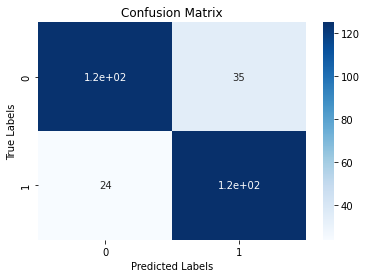

In [47]:
cm = confusion_matrix(y_test, y_pred)
# plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig("cm_ann_corr.png")
plt.show()

In [48]:
# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
error_rate = 1 - accuracy

# Print the results
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))
print("Error Rate: {:.3f}".format(error_rate))

Accuracy: 0.808
Precision: 0.810
Recall: 0.808
F1 Score: 0.808
Error Rate: 0.192


In [49]:
## Tune the Hyper Parameters (Assumption Different Architectures as changing hyperparameters)

In [50]:
model_based_on_ig_features = MLPClassifier(hidden_layer_sizes=(100, 50, 50, 50), activation='relu', solver='adam', max_iter=1000, random_state=1)


model_based_on_ig_features.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 50, 50), max_iter=1000,
              random_state=1)

In [51]:
y_pred = model_based_on_ig_features.predict(X_test)

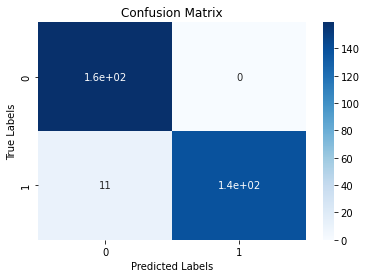

In [52]:
cm = confusion_matrix(y_test, y_pred)
# plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig("cm_ann_corr.png")
plt.show()

## Inference:
1. There are 12 values predicted wrong by the model.

In [53]:
model_based_on_ig_features = MLPClassifier(hidden_layer_sizes=(100, 50, 50), activation='relu', solver='adam', max_iter=1000, random_state=1)


model_based_on_ig_features.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 50), max_iter=1000, random_state=1)

In [54]:
y_pred = model_based_on_ig_features.predict(X_test)

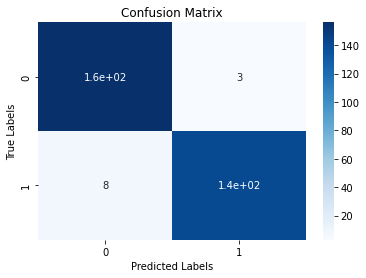

In [55]:
cm = confusion_matrix(y_test, y_pred)
# plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig("cm_ann_corr.png")
plt.show()

## Inference:
1. The confusion Matrix shows that there are 10 target that are predicted wrong by the model.
2. The second row column one 6 value shows that the True value is 1 but the model predicted it as 0.

In [56]:
# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
error_rate = 1 - accuracy

# Print the results
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))
print("Error Rate: {:.3f}".format(error_rate))

Accuracy: 0.964
Precision: 0.965
Recall: 0.964
F1 Score: 0.964
Error Rate: 0.036


In [57]:
## Apply MLP on the Features Selected by Corr Matrix

In [58]:
X = best_features_using_corr
y = heart_dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((820, 5), (205, 5), (820,), (205,))

In [60]:
X_train.head()

,oldpeak,exang,cp,thalach,ca
835,-0.231177,0,2,-1.005203,3
137,-0.912329,1,0,0.212479,0
534,-0.912329,0,2,0.777832,0
495,-0.486609,0,0,0.516900,0
244,1.131129,0,2,0.734343,0


In [61]:
X_test.head()

,oldpeak,exang,cp,thalach,ca
527,-0.912329,0,0,0.603877,0
359,-0.912329,0,2,-1.483579,0
447,-0.231177,1,0,-0.178919,1
31,0.024256,0,1,0.560389,0
621,-0.912329,1,0,0.038525,2


In [62]:
model_based_on_corr_features = MLPClassifier(hidden_layer_sizes=(10, 5), activation='logistic', solver='adam', max_iter=1000, random_state=1)


model_based_on_corr_features.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 5), max_iter=1000,
              random_state=1)

In [63]:
y_pred = model_based_on_ig_features.predict(X_test)

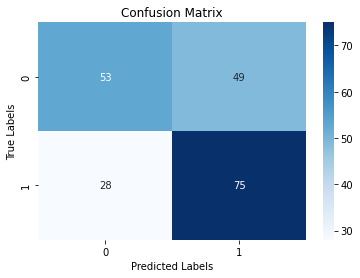

In [64]:
cm = confusion_matrix(y_test, y_pred)
# plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig("cm_ann_corr.png")
plt.show()

In [65]:
# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))

Accuracy: 0.624
Precision: 0.629
Recall: 0.624
F1 Score: 0.620


In [66]:
## Try Different Hyper Parameters of MLP

In [67]:
model_based_on_corr_features = MLPClassifier(hidden_layer_sizes=(100, 50), activation='tanh', solver='adam', max_iter=1000, random_state=1)


model_based_on_corr_features.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 50), max_iter=1000,
              random_state=1)

In [68]:
y_pred = model_based_on_ig_features.predict(X_test)

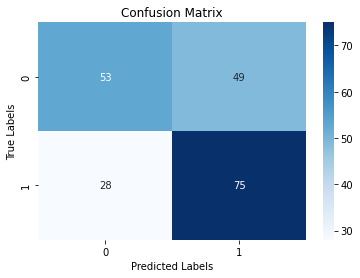

In [69]:
cm = confusion_matrix(y_test, y_pred)
# plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig("cm_ann_corr.png")
plt.show()

In [70]:
## Try Different MLP Hyperparamters

In [71]:
model_based_on_corr_features = MLPClassifier(hidden_layer_sizes=(100, 50, 50), activation='logistic', solver='adam', max_iter=1000, random_state=1)

model_based_on_corr_features.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 50, 50),
              max_iter=1000, random_state=1)

In [72]:
y_pred = model_based_on_ig_features.predict(X_test)

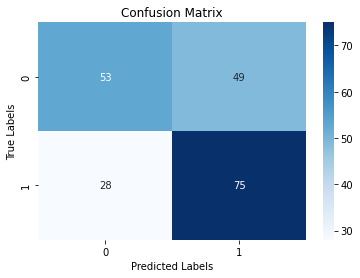

In [73]:
cm = confusion_matrix(y_test, y_pred)
# plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig("cm_ann_corr.png")
plt.show()

# Conclusion
1. After Performing different ANN architectures based on selection of features Information Gain and Correlation Matrix
2. The Information gain based features yields the best result with accuracy of 0.98 and only 6 target values are predicted wrong.
3. The dataset is small but based on the current dataset Information Gain based features selection is working great !

## Question 3

In [1]:
import numpy as np
inital_configuration = []

In [2]:
a = [1, 2, 3]
inital_configuration.append(a)
a = []
a = [8, 0, 4]
inital_configuration.append(a)
a = []
a = [7, 6, 5]
inital_configuration.append(a)

In [3]:
print(inital_configuration)

[[1, 2, 3], [8, 0, 4], [7, 6, 5]]


In [4]:
target_configuration = [1, 2, 3, 8, 0, 4, 7, 6, 5]
def fitness_function(configuration):
    iterator = 0
    h = 0
    for i in range(0, 3):
        for j in range(0, 3):
            if (configuration[i][j] == target_configuration[iterator]):
                h += 1
            iterator += 1
    return h

In [5]:
fitness_function(inital_configuration)

9

Algorithm
  - Generate 100 possible chromosomes from initial configuration
  - Select best 2 chromosomes with best fitness values
  - Apply mutation on it

In [6]:
def generate_chromosomes(configuration, n=5):
    chromosomes = []
    new_configuration = configuration
    for j in range(n):
        random_numbers_one = list(np.random.randint(0, 3, size=2))
        random_numbers_two = list(np.random.randint(0, 3, size=2))
        temp = new_configuration[random_numbers_one[0]][random_numbers_one[1]]
        new_configuration[random_numbers_one[0]][random_numbers_one[1]] = new_configuration[random_numbers_two[0]][random_numbers_two[1]]
        new_configuration[random_numbers_two[0]][random_numbers_two[1]] = temp
        chromosomes.append(new_configuration)
        new_configuration = configuration
    return chromosomes
        

In [7]:
print(inital_configuration)

[[1, 2, 3], [8, 0, 4], [7, 6, 5]]


In [8]:
generate_chromosomes = generate_chromosomes(inital_configuration)

In [9]:
generate_chromosomes

[[[1, 2, 5], [8, 4, 0], [7, 3, 6]],
 [[1, 2, 5], [8, 4, 0], [7, 3, 6]],
 [[1, 2, 5], [8, 4, 0], [7, 3, 6]],
 [[1, 2, 5], [8, 4, 0], [7, 3, 6]],
 [[1, 2, 5], [8, 4, 0], [7, 3, 6]]]

In [10]:
def select_best_two_chromosomes(generate_chromosomes):
    best_fitness_values = []
    for chromosome in generate_chromosomes:
        fitness_value = fitness_function(chromosome)
        best_fitness_values.append(fitness_value)
    best_fitness_values = np.array(best_fitness_values)
    best_chromosomes = []
    best_fitness_values = best_fitness_values.argsort()
#     Select Best fitness value chromosomes
    best_chromosomes.append(generate_chromosomes[best_fitness_values[0]])
    best_chromosomes.append(generate_chromosomes[best_fitness_values[1]])
    return best_chromosomes

In [11]:
best_chromsomes = select_best_two_chromosomes(generate_chromosomes)

In [12]:
def crossover(chromosomes):
    random_number_one = np.random.randint(0, 3, size=1)
    random_number_two = np.random.randint(0, 3, size=1)
    chromosome_one = chromosomes[0]
    chromosome_two = chromosomes[1]
    temp = chromosome_one[random_number_one[0]]
    chromosome_one[random_number_one[0]] = chromosome_two[random_number_two[0]]
    chromosome_two[random_number_two[0]] = temp
    childs = []
    childs.append(chromosome_one)
    childs.append(chromosome_two)
    return childs

In [13]:
childs = crossover(best_chromsomes)

In [16]:
print(childs)

[[[1, 2, 5], [8, 4, 0], [7, 3, 6]], [[1, 2, 5], [8, 4, 0], [7, 3, 6]]]


In [ ]:
def evaluation(max_iter = 100):
    for i in range(100):
        chromosomes = generate_chromosomes(inital_configuration)
        best_chromosomes = select_best_two_chromosomes(chromosomes)
        # Next the remaning function to call and 1 condition then genetic algo work fine
        